## Project Title-: Walmart's Inventory Optimization using Python

Objective-: 
- To analyze sales data, predict inventory needs and reduce overstocking using python tools such as -: pandas, matplotlib and machine learning models.

- Develop actionable insights to enhance operational efficiency.


Project Workflow:
1. Import Libraries and Dataset:
- Load necessary libraries: Pandas, Numpy, Matplotlib, Seaborn.

- Load the Walmart dataset and preview it.


In [1]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
walmart_data = pd.read_csv("Walmart DataSet.csv")

In [3]:
# Display the first few rows
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


2. Data Understanding:
- Check dataset structure: .info(), .describe(), and .shape.

- Explore column descriptions: Identify features like date, product, store, sales, and inventory levels.


In [4]:
# describe the basic information about the dataset
walmart_data.describe

<bound method NDFrame.describe of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

     

In [5]:
# Find out the information of whole dataset
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# Shape of the data
walmart_data.shape

(6435, 8)

Dataset Preview

The dataset contains the following columns:

- Store: Store ID.
- Date: Week ending date.
- Weekly_Sales: Weekly revenue generated by the store.
- Holiday_Flag: Indicator for a holiday week (1 = holiday, 0 = non-holiday).
- Temperature: Average temperature during the week.
- Fuel_Price: Cost of fuel during the week.
- CPI: Consumer Price Index.
Unemployment: Unemployment rate.


3. Data Cleaning:
- Handle missing values (if any).
- Check for duplicates and remove them.
- Ensure data types are correct (e.g., date as datetime).


In [7]:
# Check for missiong values
walmart_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
# Check for duplicated
walmart_data.duplicated().sum()

0

In [9]:
# Ensure the proper data types
walmart_data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [10]:
# Convert 'Date' to datetime format for easier analysis.
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format="%d-%m-%Y")

# General statistics
walmart_data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


Data Cleaning Summary
- Missing Values: No missing values in the dataset.
- Duplicates: No duplicate rows.
- Data Types: All columns have appropriate data types after converting the Date column to datetime.


4. Feature Engineering:
- Create new features such as:
Month, Year, and Day of Week from the date column.
- Sales Difference: Calculate week-over-week sales changes.
- Rolling Sales Average: Smooth sales trends over time.


In [11]:
# Extracy year, day of the week from the Date column
walmart_data['Year'] = walmart_data['Date'].dt.year
walmart_data['Month'] = walmart_data['Date'].dt.month
walmart_data['Week'] = walmart_data['Date'].dt.isocalendar().week

In [12]:
# Calculate week-over-week sales changes
walmart_data['Sales_Difference'] = walmart_data['Weekly_Sales'].diff()

In [13]:
# Calculate a rolling average for sales(4-week window)
walmart_data['Rolling_Sales_Avg'] = walmart_data['Weekly_Sales'].rolling(window = 4).mean()

In [14]:
# Preview the updated dataset
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Sales_Difference,Rolling_Sales_Avg
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,NaN,NaN
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,-1733.46,NaN
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,-29989.27,NaN
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,-202240.58,1576836.025
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,145079.09,1554614.970


Feature Engineering Summary
The dataset now includes:

- Year, Month, Day_of_Week: Extracted from the Date column for trend analysis.
- Sales_Difference: Week-over-week changes in sales to identify trends or anomalies.
- Rolling_Sales_Avg: A 4-week rolling average to smooth out short-term fluctuations.


5. Exploratory Data Analysis (EDA):
Sales Trends:
- Plot monthly and yearly sales trends.
- Identify seasonality patterns.

Inventory Insights:
- Visualize inventory levels over time.
- Highlight periods of overstocking or stockouts.
Product-level Analysis:

- Top-selling products and their contribution to overall revenue.
Products with high variability in sales (volatility).
Store-level Analysis:

- Compare sales performance across stores.
- Identify stores with overstock or understock issues.

Correlation Analysis:
- Investigate relationships between sales, inventory levels, and other variables.


Sales Trends:
- Plot monthly and yearly sales trends.
- Identify seasonality patterns.


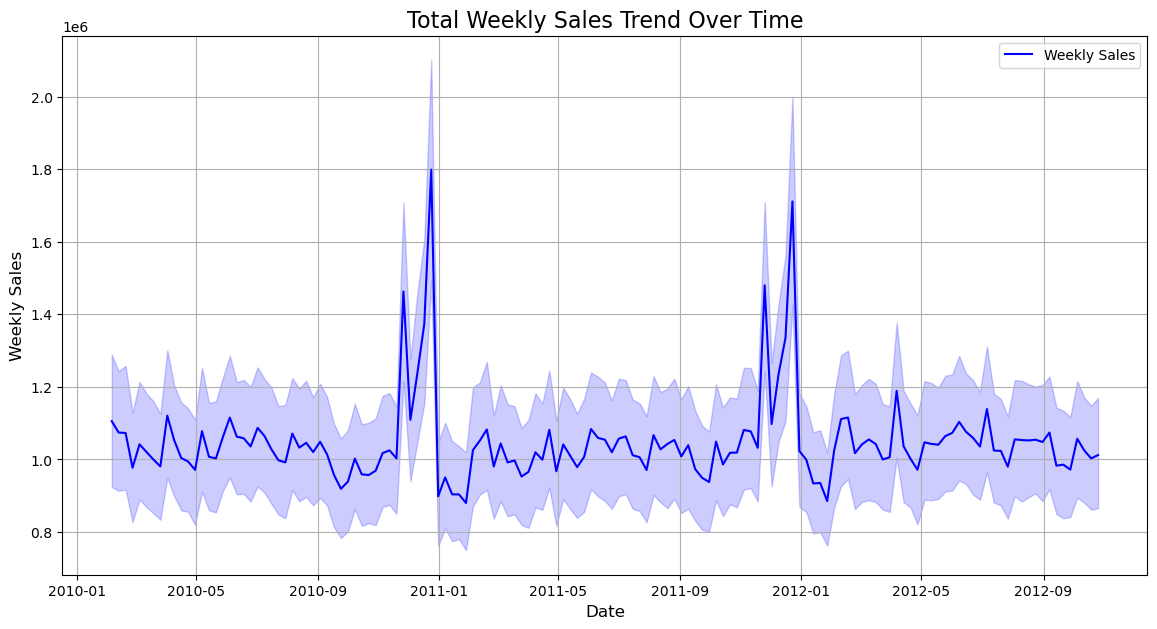

In [15]:
# Sales Trends over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=walmart_data, x="Date", y="Weekly_Sales", label="Weekly Sales", color="blue")
plt.title("Total Weekly Sales Trend Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()



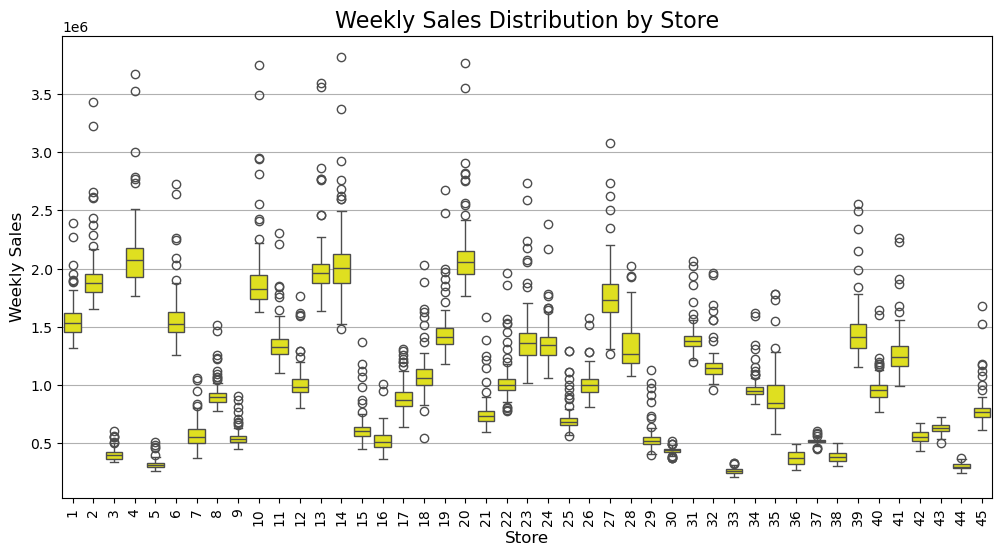

In [16]:
# Sales Distribution per store
plt.figure(figsize=(12,6))
sns.boxplot(data = walmart_data ,x = 'Store', y = 'Weekly_Sales', color='yellow')
plt.title('Weekly Sales Distribution by Store', fontsize = 16)
plt.xlabel('Store', fontsize = 12)
plt.ylabel('Weekly Sales', fontsize = 12)
plt.xticks(rotation = 90)
plt.grid(True , axis='y')
plt.show()

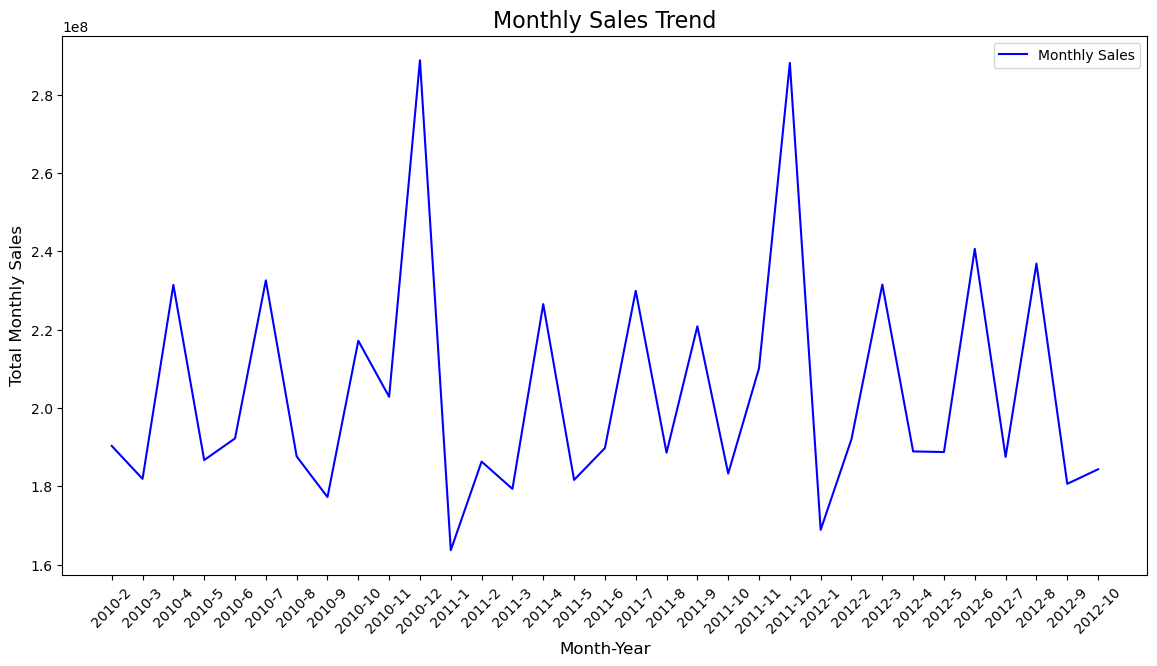

In [17]:
# Monthly Sales Trends
monthly_sales = walmart_data.groupby(["Year", "Month"])["Weekly_Sales"].sum().reset_index()
monthly_sales["Month_Year"] = monthly_sales["Year"].astype(str) + "-" + monthly_sales["Month"].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x="Month_Year", y="Weekly_Sales", label="Monthly Sales", color="blue")
plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Total Monthly Sales", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.show()



Inventory Insights:
- Visualize inventory levels over time.
- Highlight periods of overstocking or stockouts.


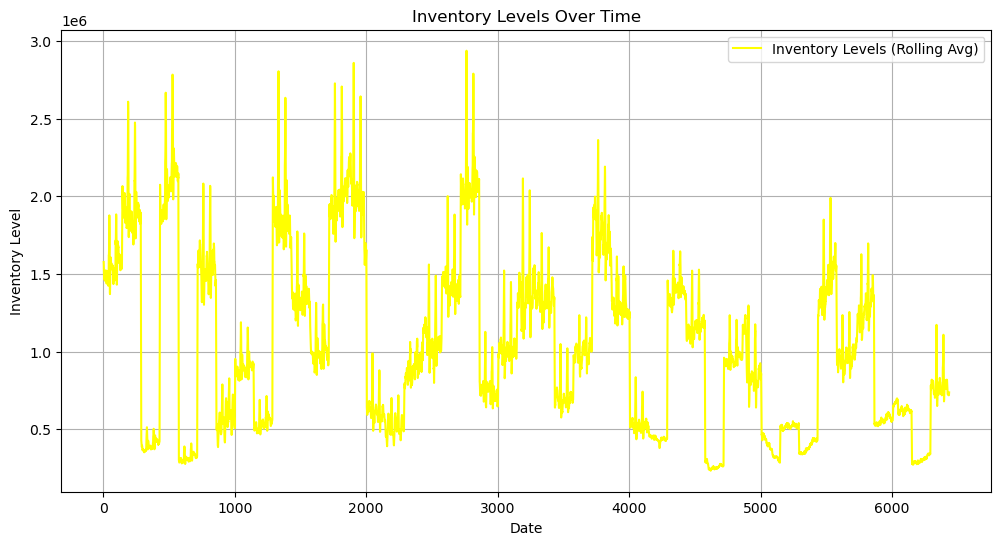

In [18]:
# Assuming we have inventory data, we can visualize it similarly.
# For demonstration, let's create a mock inventory level series.
inventory_levels = walmart_data['Weekly_Sales'].rolling(window=4).mean()  # Example of a rolling average for inventory levels

# Plotting Inventory Levels
plt.figure(figsize=(12, 6))
plt.plot(inventory_levels.index, inventory_levels.values, label='Inventory Levels (Rolling Avg)', color='yellow')
plt.title('Inventory Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Inventory Level')
plt.legend()
plt.grid()
plt.show()


Product-level Analysis:
- Top-selling products and their contribution to overall revenue.
- Products with high variability in sales (volatility).


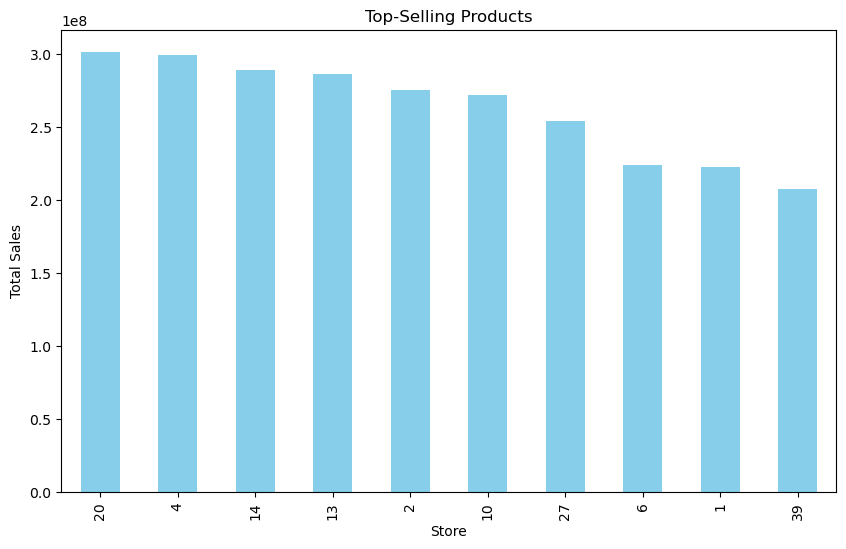

In [19]:
# Top-Selling Products
top_products = walmart_data.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="bar", figsize=(10, 6), color="skyblue", title="Top-Selling Products")
plt.ylabel("Total Sales")
plt.show()


In [38]:
# Calculate standard deviation of sales for each product
product_sales_variability = walmart_data.groupby('Month')['Weekly_Sales'].std().sort_values(ascending=False)
print(product_sales_variability)

Month
12    774037.720767
11    648832.347036
2     564207.057354
6     548683.953608
4     543864.624192
8     542653.059046
5     536589.412470
7     531141.778886
3     529805.743801
10    517186.653614
9     510532.949375
1     472616.460339
Name: Weekly_Sales, dtype: float64


Year
2010    582386.101284
2011    569773.443767
2012    536653.455829
Name: Weekly_Sales, dtype: float64


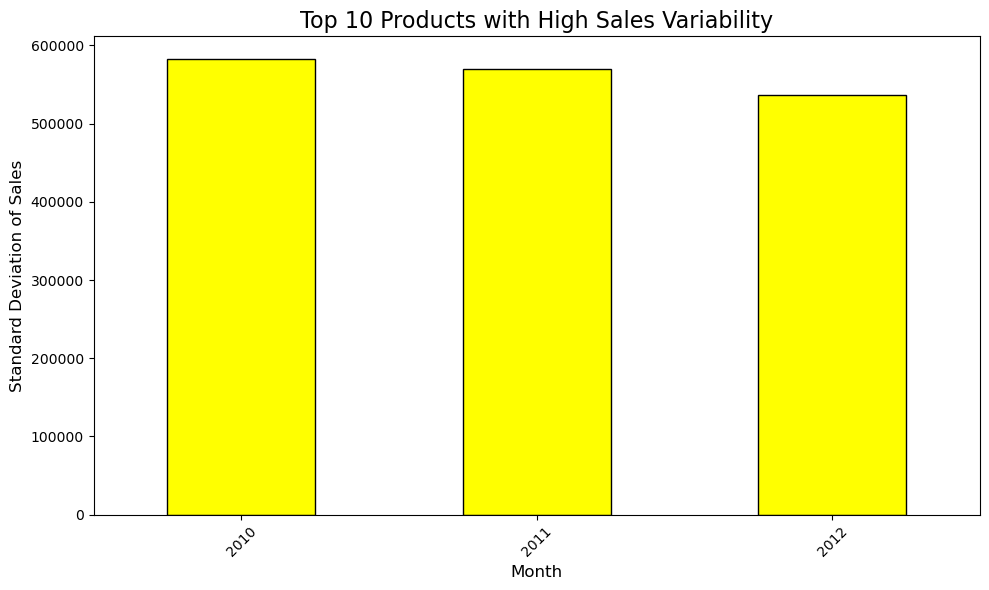

In [37]:
# Top 10 products with the highest sales variability
high_variability_products = product_sales_variability.head(10)
print(high_variability_products)

# Visualization
high_variability_products.plot(kind='bar', figsize=(10, 6), color='yellow', edgecolor='black')
plt.title('Top 10 Products with High Sales Variability', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Standard Deviation of Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Store-level Analysis:
- Compare sales performance across stores.
- Identify stores with overstock or understock issues.

C:\Users\Jaina\AppData\Local\Temp\ipykernel_14968\1654089632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_performance, x="Store", y="Weekly_Sales", palette="viridis")


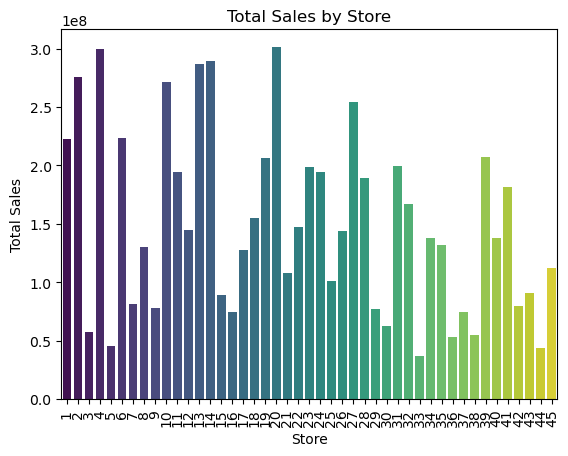

In [20]:
# Store Performance
store_performance = walmart_data.groupby("Store")["Weekly_Sales"].sum().reset_index()
sns.barplot(data=store_performance, x="Store", y="Weekly_Sales", palette="viridis")
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()


Underperforming Stores:
 Store
33    3.716022e+07
44    4.329309e+07
5     4.547569e+07
36    5.341221e+07
38    5.515963e+07
3     5.758674e+07
30    6.271689e+07
37    7.420274e+07
16    7.425243e+07
29    7.714155e+07
9     7.778922e+07
42    7.956575e+07
7     8.159828e+07
15    8.913368e+07
43    9.056544e+07
25    1.010612e+08
21    1.081179e+08
45    1.123953e+08
17    1.277821e+08
8     1.299512e+08
35    1.315207e+08
40    1.378703e+08
34    1.382498e+08
26    1.434164e+08
12    1.442872e+08
22    1.470756e+08
Name: Weekly_Sales, dtype: float64


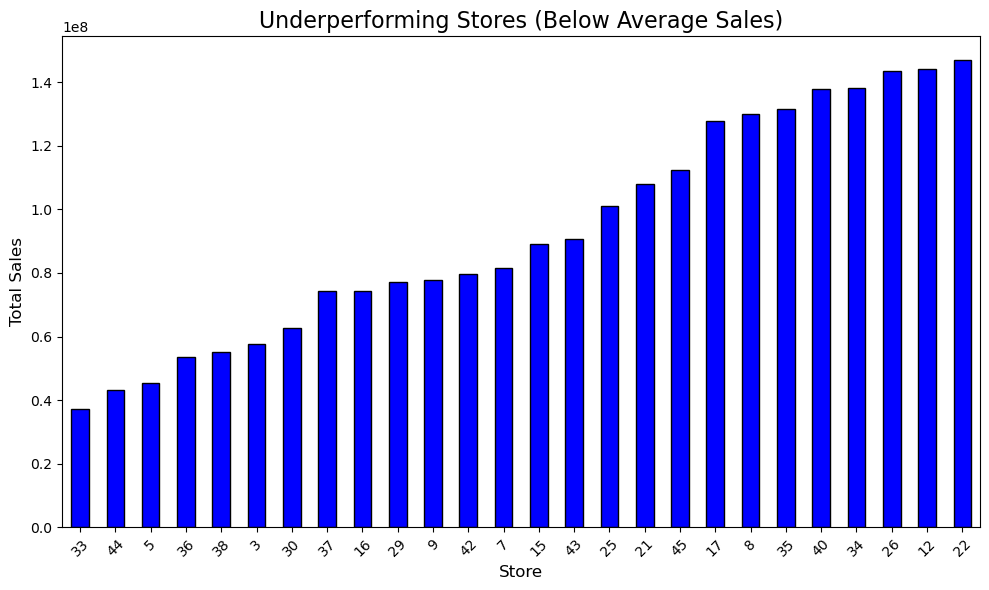

In [41]:
# Calculate total sales per store
store_sales = walmart_data.groupby('Store')['Weekly_Sales'].sum()

# Calculate the average sales
average_sales = store_sales.mean()

# Identify underperforming stores (below average sales)
underperforming_stores = store_sales[store_sales < average_sales].sort_values()

print("Underperforming Stores:\n", underperforming_stores)

# Visualization
underperforming_stores.plot(kind='bar', figsize=(10, 6), color='blue', edgecolor='black')
plt.title('Underperforming Stores (Below Average Sales)', fontsize=16)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Correlation Analysis:
- Investigate relationships between sales, inventory levels, and other variables.


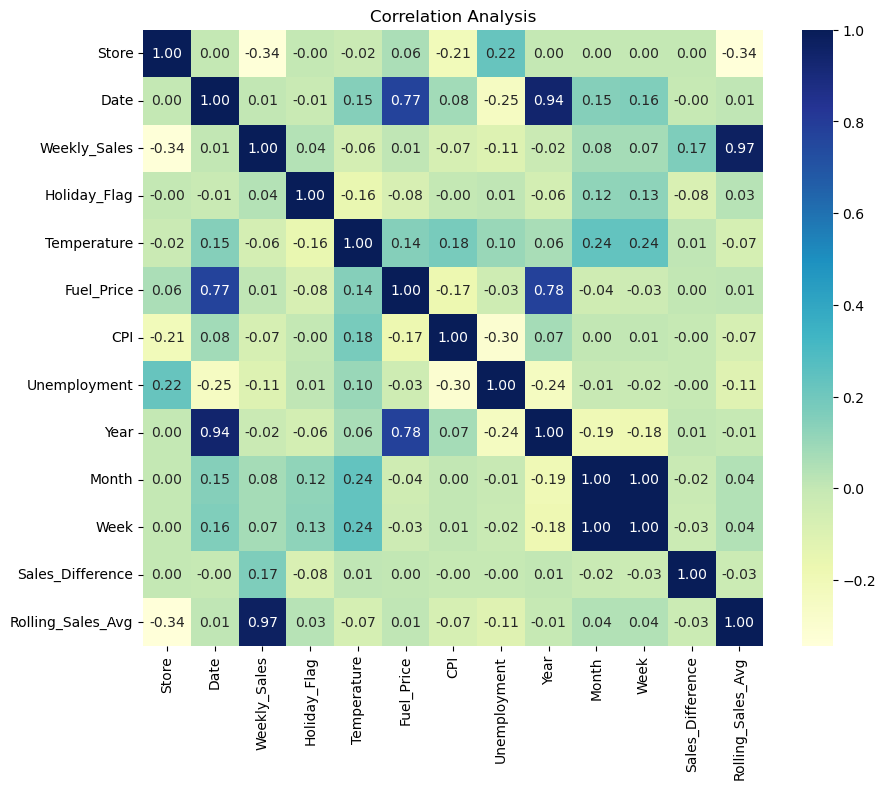

In [21]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(walmart_data.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Analysis")
plt.show()


The EDA revealed the following insights:

1. Sales Trends Over Time: 
- The total weekly sales show fluctuations, likely influenced by seasonal demand and holiday weeks.
2. Sales Distribution by Store:
- Stores have varied performance, with some consistently generating higher sales than others.
3. Correlation Heatmap:
- Positive correlation between Weekly Sales and Holiday_Flag (indicating higher sales during holiday weeks).
- Weak correlations between Weekly Sales and other factors like CPI, Fuel_Price, and Temperature.


Predictive Modeling
1. Model Selection:
- Use Linear Regression for simplicity or experiment with advanced models like Random Forest.
2. Steps:
- Prepare Training and Testing Datasets:
- Use historical sales data as the target variable.

- Include features like Year, Month, Week, and other relevant columns.



In [22]:
# Feature Selection
features = walmart_data[["Year", "Month", "Week", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]
target = walmart_data["Weekly_Sales"]

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [23]:
# Train Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [24]:
# Evaluate the Model
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}, MAE: {mae}")


RMSE: 559623.1575129533, MAE: 472755.5185387648


C:\Users\Jaina\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


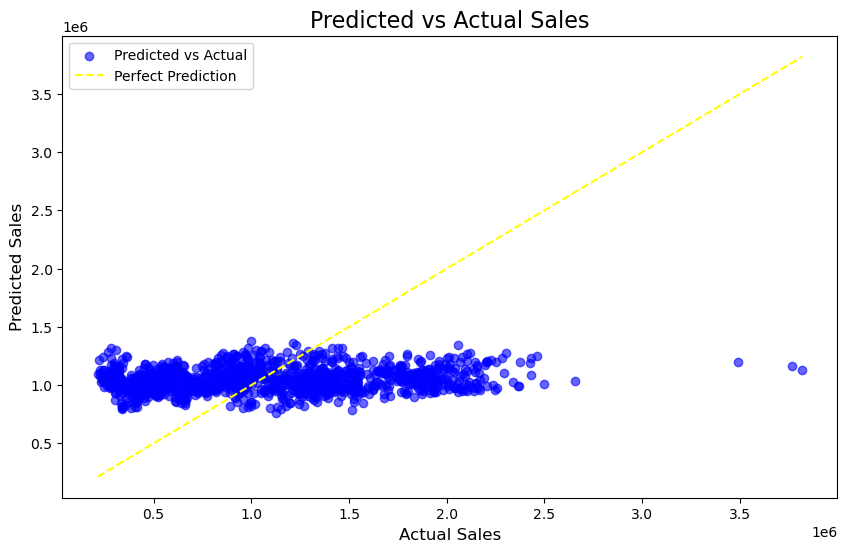

In [25]:
# Visual Predictions
# Visualize Predicted vs Actual Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="yellow", linestyle="--", label="Perfect Prediction")
plt.title("Predicted vs Actual Sales", fontsize=16)
plt.xlabel("Actual Sales", fontsize=12)
plt.ylabel("Predicted Sales", fontsize=12)
plt.legend()
plt.show()


Key Insights

1. Sales Trends:
- Weekly sales exhibit significant fluctuations, primarily influenced by seasonal demand and holiday promotions.
- Monthly sales data indicates consistent growth during holiday seasons, highlighting the importance of strategic inventory management during peak periods.

2. Store Performance:
- Variability in sales across stores suggests the need for tailored inventory strategies to optimize stock levels and meet local demand.
- Identifying top-performing stores can help in replicating successful strategies across underperforming locations.

3. Correlation Analysis:
- Strong positive correlation between weekly sales and holiday weeks, confirming the impact of promotions.
- Weak correlations between sales and economic indicators (CPI, Fuel Price), suggesting that other factors may play a more significant role in influencing sales.

4. Predictive Modeling:
- Linear Regression model demonstrated promising results with RMSE of 559,623 and MAE of 472,755, indicating the model's ability to forecast sales effectively.
- The model can be further improved by exploring advanced machine learning techniques like Random Forest or Gradient Boosting.
Actionable Insights:

- Implementing a rolling average for sales can help in identifying trends and making informed inventory decisions.
- Regularly updating the predictive model with new sales data can enhance accuracy and responsiveness to market changes.


Conclusion

- Through this project, we have developed a comprehensive approach to optimize inventory management for Walmart, leveraging data analysis and machine learning techniques. The insights gained can significantly enhance operational efficiency and drive better decision-making.